In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Wine_clust .csv')

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


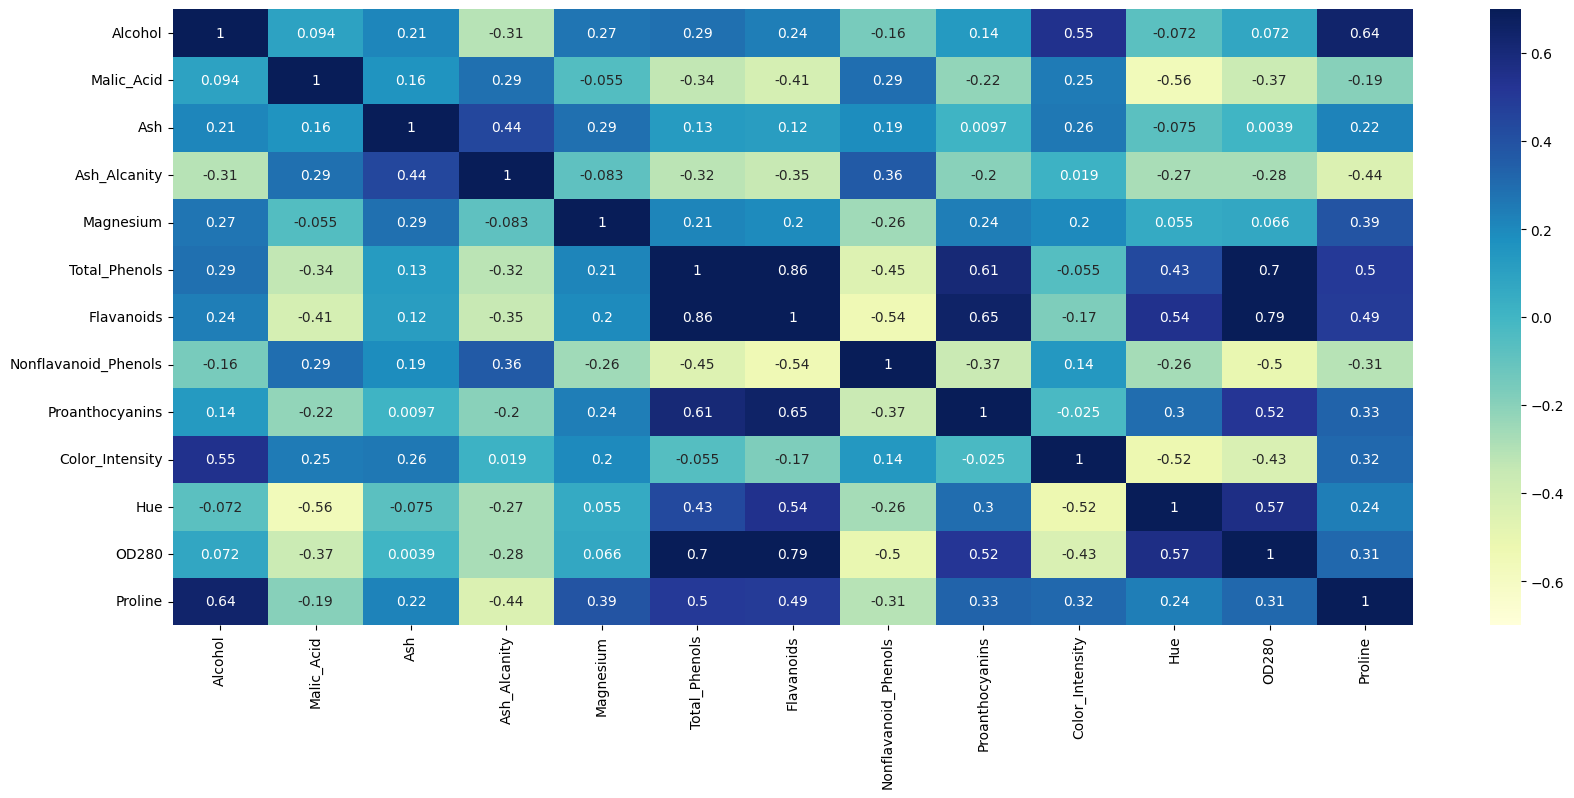

In [5]:
plt.subplots(figsize = (20,8))
sns.heatmap(data.corr(), annot = True, vmin = -0.7, vmax = 0.7, cmap = 'YlGnBu')
plt.show()

**WE WILL USE 'FLAVANOIDS' AND 'OD280' FOR CLUSTERING SINCE BOTH HAVE STRONG AND MEDIUM CORRELATIONS TO ALL FEATURES**

1. **KMeans Clustering**

In [6]:
from sklearn.cluster import KMeans

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
x = data.iloc[:,[6,11]].values

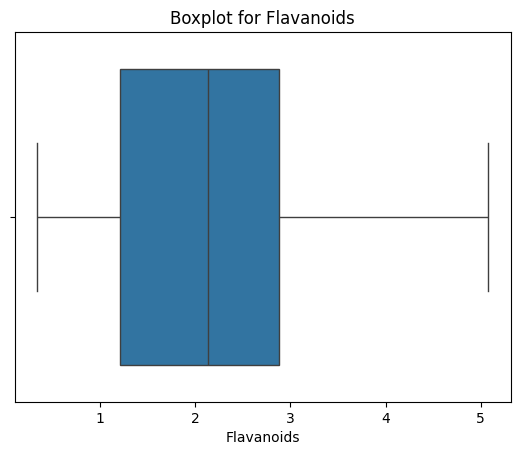

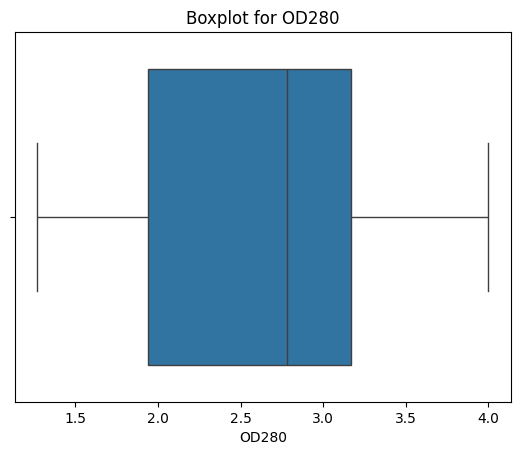

In [9]:
#We are only looking at the outliers of the selected features and not the entire data

cls = data.columns[[6,11]]
for col in cls:
    sns.boxplot(x=data[col], data=data)
    plt.title(f"Boxplot for {col}")
    plt.show()

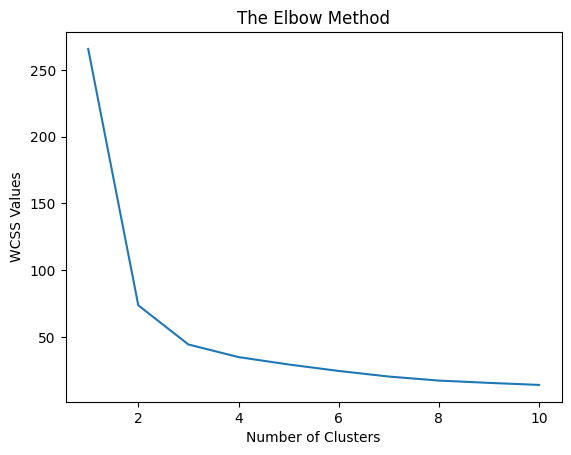

In [10]:
#Elbow Method to find the optimun number of clusters using KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

**BY ELBOW METHOD THE IDEAL CLUSTERS IS FOUND TO BE 3**

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [12]:
data['KMeans Labels'] = y_kmeans

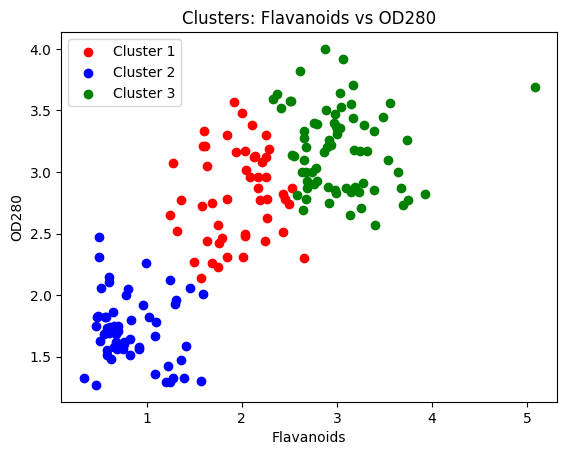

In [13]:
#Plotting Clusters

colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(data['Flavanoids'][data['KMeans Labels'] == i],
                data['OD280'][data['KMeans Labels'] == i],
                c=colors[i], label=f'Cluster {i+1}')
plt.title('Clusters: Flavanoids vs OD280')
plt.ylabel('OD280')
plt.xlabel('Flavanoids')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
ss = silhouette_score
ss(x, y_kmeans)

0.49577583999841035

**A Silhouette scoreof 0.49577 indicate cluttering and overlapping and still isn't good enough. So we will iterate through the columns to find the best features for KMeans**

In [15]:
#Combination of 2 columns

import itertools

score = []
max_score = 0
max_combination = None

col_num = np.arange(0, 13)
comb = list(itertools.combinations(col_num, 2))
for a, b in comb:
    x = data.iloc[:, [a, b]]
    y_kmeans = kmeans.fit_predict(x)
    current_score = silhouette_score(x, y_kmeans)
    score.append(current_score)

    if current_score > max_score:
        max_score = current_score
        max_combination = (a, b)
print(f"Combination with maximum score: {max_combination} (Score: {max_score})")

Combination with maximum score: (1, 7) (Score: 0.6086980543675791)


In [16]:
#Combination of 3 columns

score = []
max_score = 0
max_combination = None

col_num = np.arange(0, 13)
comb = list(itertools.combinations(col_num, 3))
for a, b, c in comb:
    x = data.iloc[:, [a, b, c]]
    y_kmeans = kmeans.fit_predict(x)
    current_score = silhouette_score(x, y_kmeans)
    score.append(current_score)

    if current_score > max_score:
        max_score = current_score
        max_combination = (a, b, c)
print(f"Combination with maximum score: {max_combination} (Score: {max_score})")

Combination with maximum score: (7, 10, 12) (Score: 0.5810018543792868)


**We will proceed with the two combinations since the score is slightly better in that case.**

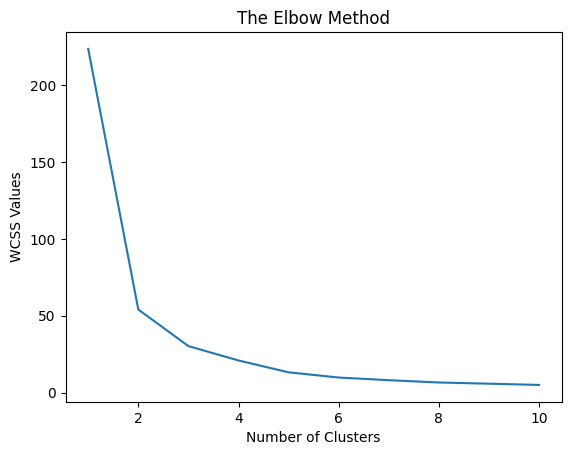

In [18]:
#Elbow Method to find the optimun number of clusters using KMeans with new features

wcss = []
for i in range(1,11):
    x = data.iloc[:, [1, 7]]
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [21]:
x = data.iloc[:, [1,7]]
y_kmeans = kmeans.fit_predict(x)

In [22]:
ss(x, y_kmeans)

0.6086980543675791

In [23]:
#Checking the cluster for scaled data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
sc_x = sc.fit_transform(x)
kmeans.fit(sc_x)
ss(sc_x, kmeans.labels_)

0.44828909232810116

**The Non Scaled data yields fairly best result and the scatter is plotted.**

In [25]:
data['KMeans Labels'] = y_kmeans

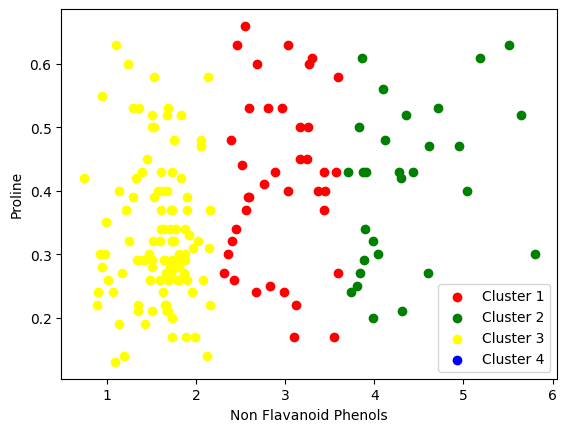

In [26]:
color = ['red', 'green', 'yellow', 'blue']
for i in range(4):
    plt.scatter(data['Malic_Acid'][data['KMeans Labels']== i],
            data['Nonflavanoid_Phenols'][data['KMeans Labels']== i], c = color[i],
               label=f'Cluster {i+1}')
plt.xlabel('Non Flavanoid Phenols')
plt.ylabel('Proline')
plt.legend(loc = 'best')
plt.show()

**RESULT FOR KMEANS**

**Silhouette Score = 0.5792**

In [28]:
import plotly.express as px
fig = px.scatter(x = data['Malic_Acid'], y = data['Nonflavanoid_Phenols'], color = data['KMeans Labels'])
fig.show()

2. **AGGLOMERATIVE CLUSTERING**

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
import scipy.cluster.hierarchy as sch

In [42]:
#Let's try the 7, 12 combination

x = data.iloc[:,[7,12]].values

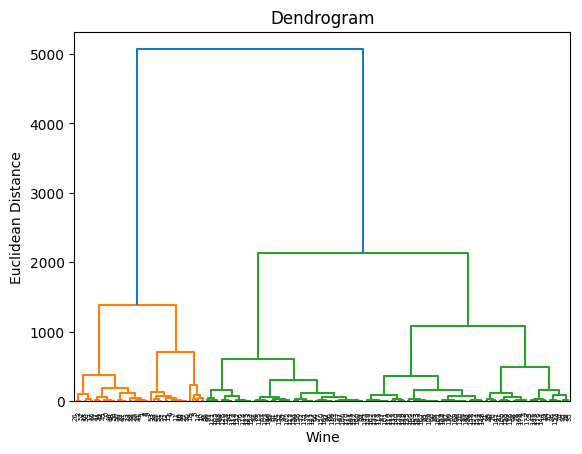

In [43]:
dend = sch.dendrogram(sch.linkage(x, method= 'ward' ))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean Distance')
plt.show()

**BY DRAWING THE LINE ACROSS THE GREATEST EUCLIDEAN DISTANCE FROM 8.25 TO 18.25 WE GET 2 CLUSTERS**

In [44]:
hc = AgglomerativeClustering(n_clusters=2, metric= 'euclidean', linkage= 'ward')
y_hc = hc.fit_predict(x)

In [45]:
ss(x, y_hc)

0.6605399718938791

**This is a much better score than KMeans**

In [46]:
#Let's scale the data and try this
sc_x = sc.fit_transform(x)
y_hc_x = hc.fit_predict(sc_x)
ss(sc_x, y_hc_x)

0.427546756950746

**THE PREVIOUS SCORE OF 0.6605 IMPLIES THAT OUR CLUSTERS ARE AT SMALL DISTINGUISHABLE DISTANCES**

Let's iterate through different combinations of columns for scaled and non scaled data

In [47]:
#Combination of 2 columns for non scaled data

score = []
max_score = 0

col_num = np.arange(0, 13)
comb = list(itertools.combinations(col_num, 2))
for a, b in comb:
    x = data.iloc[:, [a, b]]
    y_hc = hc.fit_predict(x)
    current_score = ss(x, y_hc)
    score.append(current_score)

    if current_score > max_score:
        max_score = current_score
        max_combination = (a, b)
print(f"Combination with maximum score: {max_combination} (Score: {max_score})")

Combination with maximum score: (7, 12) (Score: 0.6605399718938791)


**Our assumption was right**

In [48]:
#Combination of 2 columns for scaled data
score = []
max_score = 0

col_num = np.arange(0, 13)
comb = list(itertools.combinations(col_num, 2))
for a, b in comb:
    x = data.iloc[:, [a, b]]
    sc_x = sc.fit_transform(x)
    y_hc = hc.fit_predict(sc_x)
    current_score = ss(sc_x, y_hc)
    score.append(current_score)

    if current_score > max_score:
        max_score = current_score
        max_combination = (a, b)
print(f"Combination with maximum score: {max_combination} (Score: {max_score})")

Combination with maximum score: (6, 11) (Score: 0.613522111287931)


**The combination of 2 features 7,12 which are non scaled gives a better score of 0.6605**

**Number of clusters is 2**

In [49]:
hc = AgglomerativeClustering(n_clusters=2, metric= 'euclidean', linkage= 'ward')
y_hc = hc.fit_predict(x)
ss(x, y_hc)

0.6605213403004389

In [50]:
data['Agg Cluster Label'] = y_hc

In [51]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'KMeans Labels', 'Agg Cluster Label'],
      dtype='object')

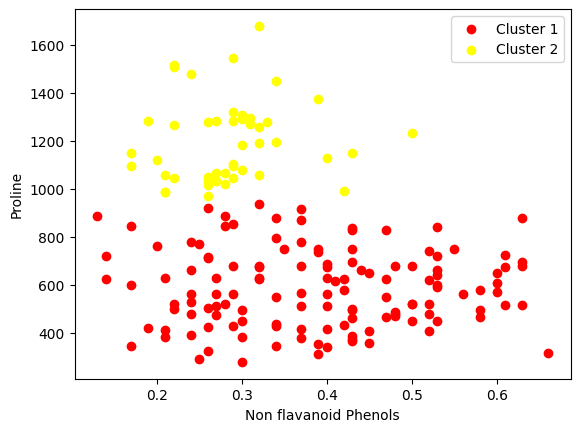

In [52]:
color = ['red', 'yellow']
for i in range(2):
    plt.scatter(data['Nonflavanoid_Phenols'][data['Agg Cluster Label']== i],
            data['Proline'][data['Agg Cluster Label']== i], c = color[i],
               label=f'Cluster {i+1}')
plt.ylabel('Proline')
plt.xlabel('Non flavanoid Phenols')
plt.legend(loc = 'best')
plt.show()

In [53]:
fig = px.scatter(x = data['Nonflavanoid_Phenols'], y = data['Proline'], color = data['Agg Cluster Label'])
fig.show()

In [54]:
ss(x, data['Agg Cluster Label'])

0.6605213403004389

*LET'S APPLY DBSCAN TO FIND THE DENSITY AND CLUSTERS*

In [55]:
from sklearn.cluster import DBSCAN

In [57]:
#Standardising data

sc_x = sc.fit_transform(x)
sc_data = sc.fit_transform(data)

In [58]:
#Generation of combinations for Epsilon and Min Samples
epsilons = np.linspace(0.01, 1, num = 40)
min_samples = np.arange(4, 60, 2)
combinations = list(itertools.product(epsilons, min_samples))
ss = silhouette_score

In [59]:
def optimum_dbscan(combinations, X):
    scores = []
    all_labels_list = []

    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            continue

        scores.append(ss(X, labels))
        all_labels_list.append(labels)

    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'Best epsilon': best_parameters[0],
            'Best min_samples': best_parameters[1],
            'Best labels': best_labels,
            'Best score': best_score}

In [66]:
#Combination of 2 columns for scaled data

score = []
max_score = float('-inf')
max_combination = None
best_parameters = None

sc_data = sc.fit_transform(data)
sc_data = pd.DataFrame(sc_data)

col_num = np.arange(0, 13)
comb = list(itertools.combinations(col_num, 2))
for a, b in comb:
    sc_x = sc_data.iloc[:, [a, b]]
    parameters = optimum_dbscan(combinations, sc_x)
    current_score = parameters['Best score']
    score.append(parameters['Best score'])

    if current_score > max_score:
        max_score = current_score
        max_combination = (a, b)
        best_parameters = parameters
print(f"Combination with maximum score: {max_combination} (Score: {max_score})")

Combination with maximum score: (6, 11) (Score: 0.5783864108164515)


In [67]:
best_parameters

{'Best epsilon': 0.8730769230769231,
 'Best min_samples': 50,
 'Best labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,
         1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1]),
 'Best score': 0.5783864108164515}

In [68]:
#Combination of 2 columns for non scaled data

score = []
max_score = float('-inf')
max_combination = None
best_parameters = None

col_num = np.arange(0, 13)
comb = list(itertools.combinations(col_num, 2))
for a, b in comb:
    x = data.iloc[:, [a, b]]
    parameters = optimum_dbscan(combinations, x)
    current_score = parameters['Best score']
    score.append(parameters['Best score'])

    if current_score > max_score:
        max_score = current_score
        max_combination = (a, b)
        best_parameters = parameters
print(f"Combination with maximum score: {max_combination} (Score: {max_score})")

Combination with maximum score: (1, 7) (Score: 0.6269843380155541)


In [69]:
best_parameters

{'Best epsilon': 0.26384615384615384,
 'Best min_samples': 10,
 'Best labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  0,  0, -1, -1, -1,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,
        -1, -1,  1,  0,  0,  0,  1, -1,  1,  1, -1, -1,  1,  1,  1,  0,  0,
         1,  0, -1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1,  0, -1,
         1,  0,  0, -1,  1,  1,  0,  1]),
 'Best score': 0.6269843380155541}

**We proceed with the column 1 and 7.**

In [70]:
x = data.iloc[:, [1,7]]
dbscan = DBSCAN(eps = 0.26384615384615384, min_samples = 10)
dbscan.fit(x)

DBSCAN(eps=0.26384615384615384, min_samples=10)

In [71]:
data['DBSCAN Label'] = dbscan.labels_
data['DBSCAN Label'].value_counts()

DBSCAN Label
 0    130
 1     37
-1     11
Name: count, dtype: int64

In [72]:
ss(x, data['DBSCAN Label'])

0.6269843380155541

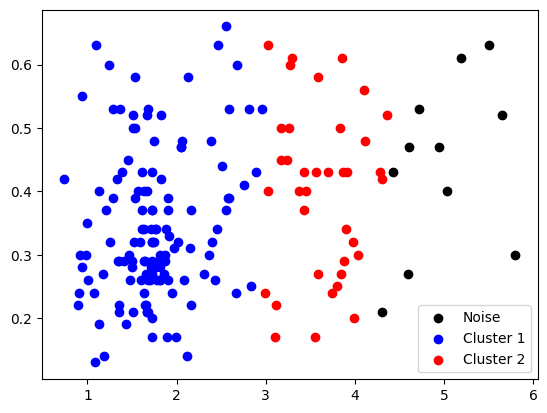

In [73]:
color = ['blue','red', 'black']
for i in range(-1,2):
    plt.scatter(data['Malic_Acid'][data['DBSCAN Label']==i],
            data['Nonflavanoid_Phenols'][data['DBSCAN Label']==i],
            c = color[i], label = f'Cluster {i+1}' if i != -1 else 'Noise')
plt.legend()
plt.show()

In [74]:
fig = px.scatter(x = data['Malic_Acid'], y = data['Nonflavanoid_Phenols'], color = data['DBSCAN Label'])
fig.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0,1))

In [76]:
mm_data = mm.fit_transform(data)
mm_data = pd.DataFrame(mm_data)

In [77]:
#Combination of 2 columns for scaled data

score = []
max_score = float('-inf')
max_combination = None
best_parameters = None

col_num = np.arange(0, 13)
comb = list(itertools.combinations(col_num, 2))

for a, b in comb:
    mm_x = mm_data.iloc[:, [a, b]]
    parameters = optimum_dbscan(combinations, mm_x)
    current_score = parameters['Best score']
    score.append(current_score)

    if current_score > max_score:
        max_score = current_score
        max_combination = (a, b)
        best_parameters = parameters

print(f"Combination with maximum score: {max_combination} (Score: {max_score})")

Combination with maximum score: (6, 11) (Score: 0.579625438887619)


In [78]:
best_parameters

{'Best epsilon': 0.16230769230769232,
 'Best min_samples': 30,
 'Best labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  0,
         1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1]),
 'Best score': 0.579625438887619}

In [79]:
mm_x = mm_data.iloc[:, [6, 11]]
dbscan = DBSCAN(eps = 0.16230769230769232, min_samples = 30)
dbscan.fit(mm_x)
ss(mm_x, dbscan.labels_)

0.579625438887619

In [80]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [81]:
data['DBSCAN (MinMax)'] = dbscan.labels_
data['DBSCAN (MinMax)'].value_counts()

DBSCAN (MinMax)
 0    116
 1     60
-1      2
Name: count, dtype: int64

In [82]:
ss(mm_x, data['DBSCAN (MinMax)'])

0.579625438887619

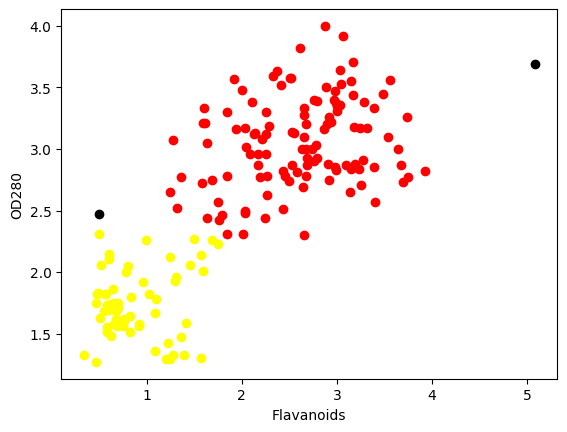

In [89]:
color = ['red', 'yellow', 'black']
for i in range(-1, 2):
    plt.scatter(data['Flavanoids'][data['DBSCAN (MinMax)'] == i],
                data['OD280'][data['DBSCAN (MinMax)'] == i],
                c=color[i],
                label=f'Cluster {i+1}' if i != -1 else 'Noise')
plt.xlabel('Flavanoids')
plt.ylabel('OD280')
plt.show()

**MinMax Scaling identified two data as noise**

In [85]:
#Data identified as noise by DBSCAn in MinMax Scaling
data.loc[data['DBSCAN (MinMax)'] == -1]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans Labels,Agg Cluster Label,DBSCAN Label,DBSCAN (MinMax)
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.0,0.93,3.69,465,2,0,0,-1
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.6,0.70,2.47,780,0,0,0,-1


In [86]:
data.loc[data['DBSCAN Label'] == -1]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans Labels,Agg Cluster Label,DBSCAN Label,DBSCAN (MinMax)
122,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365,1,0,-1,0
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,1,0,-1,0
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380,1,0,-1,0
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720,1,0,-1,1
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515,1,0,-1,1
143,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550,1,0,-1,1
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,1,0,-1,1
147,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625,1,0,-1,1
155,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725,1,0,-1,1
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,1,0,-1,1


**#RESULTS**

1. KMeans had the lowest SS score of 0.6086
2. Agglomerative Clustering showed a considerable spike to 0.6605
3. DBSCAN clustered all the data points with a score of 0.6269 and identified 11 points as noise
4. DBSCAN after MinMAx scaling identified two data points as noise with a score of 0.572